<a href="https://colab.research.google.com/github/PriyeshRaoBK/PriyeshRaoBK/blob/main/Satelite_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This project is done for learning purpose. It invoves analysis of data collected from sentinel in image tiff format. Here we used 12 bands of data that collected from satelite. Using these bands I calculated diferent index like soil index, water indext and vegetation index.**

In [ ]:
pip install earthpy #Installin Earthpy libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00


# **To perform different operations on the Sundarbans data, we are going to use libraries such as EarthPy, RasterIO, Matplotlib, Plotly for Data Visualization and Analysis.**

In [ ]:
from glob import glob #this module used to return all file paths that match a specific pattern.

import earthpy as et #EarthPy is a python package devoted to working with spatial and remote sensing data it consist of spatial, plot, mask,io function
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio #module for raster processing which you can use for reading and writing several different raster formats in Python

import matplotlib.pyplot as plt # a collection of command style functions that make matplotlib work like MATLAB
import numpy as np
from matplotlib.colors import ListedColormap #useful when indexing directly into a colormap, but it can also be used to generate special colormaps for ordinary mapping.

import plotly.graph_objects as go # plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

np.seterr(divide='ignore', invalid='ignore') # This warning occurs when you attempt to divide by some invalid value (such as NaN, Inf, etc.) in a NumPy array.

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# * Read the 12 bands using rasterio 
# * Stack them into array using numpy.stack() method. shape (12, 954, 298)

In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/Almabetter/sundarbans_data/*B?*.tiff") # reafin tiffforma image bands

S_sentinel_bands.sort() # sorting bands

l = []

for i in S_sentinel_bands:
  with rio.open(i, 'r') as f: #opens the raster file specified by the i variable in read mode. with is a context manager that ensures the file is properly closed 
    l.append(f.read(1)) # f.read(1) reads the first band (or layer) of the raster file as a NumPy array and appends it to the list l.
    
arr_st = np.stack(l)

# **Data contains 12 bands**
# **Vizualizing each bands using earth py package**

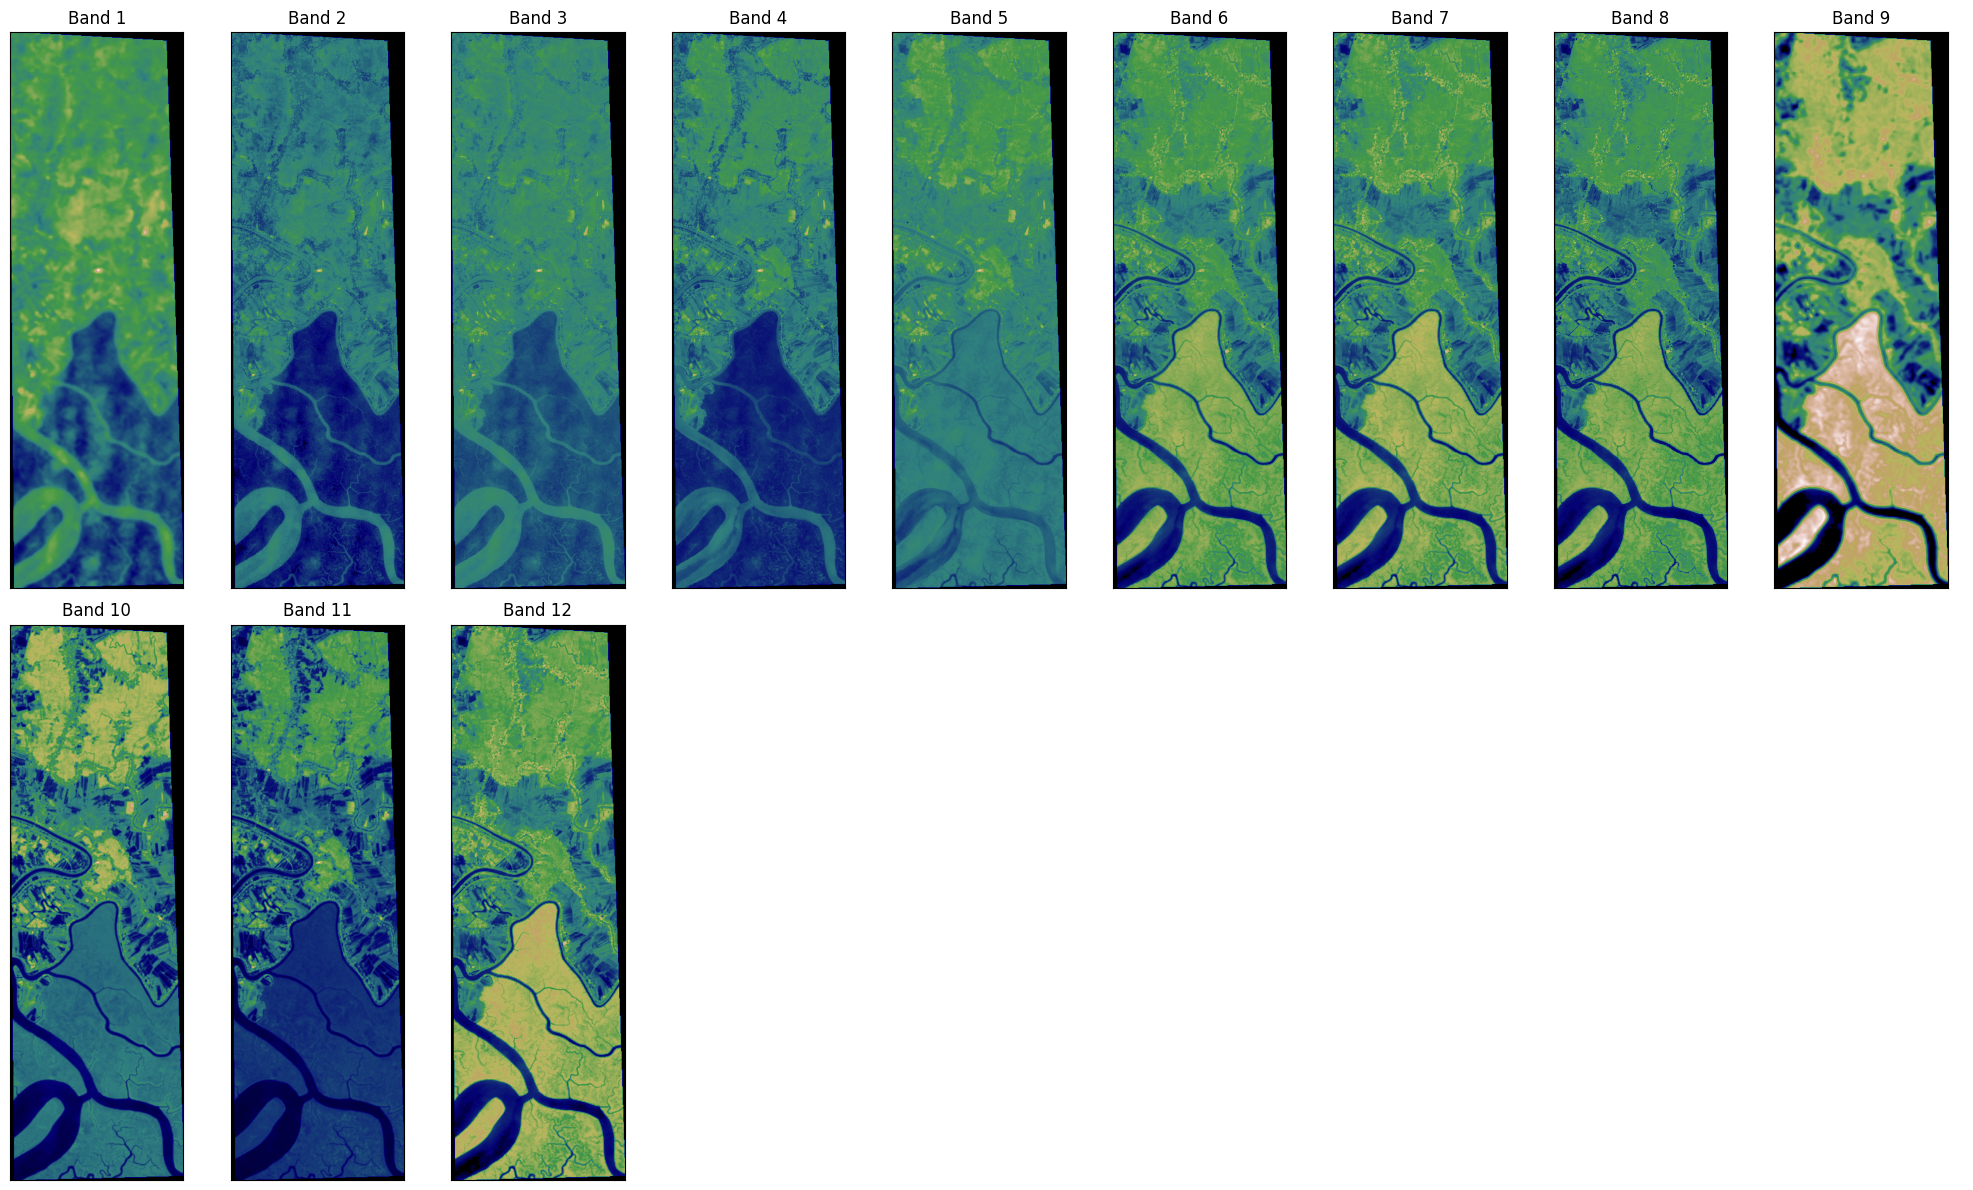

In [ ]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 9, 
              cbar = False) 
# ep.plot_bands() function from the earthpy.plot module to create a plot of a NumPy array
# arr_st: This is the NumPy array that you want to plot.
#cmap: This parameter sets the color map that is used for the plot. In this case, the 'gist_earth' colormap is used, which is a perceptually uniform colormap that is designed to represent elevation data.
#figsize: This parameter sets the size of the figure in inches. In this case, the figure is 20 inches wide by 12 inches tall.
#cols: This parameter sets the number of columns in the plot. In this case, the plot is arranged in 9 columns, which means that there will be 9 plots per row.
#cbar: This parameter controls whether or not a colorbar is included in the plot. In this case, it is set to False, which means that no colorbar will be included.
plt.show()


# Consisted multiple bands ranging from visible to infrared.
# Hard to viszualize humans
# Creating RGB composite which are 4,3,2
# Python uses zero based index need to substarct 1
# sometimes composite images to be dark if the pixel brightness values are skewed toward the value of zero
# stretching the pixel brightness values in an image using the argument stretch=True

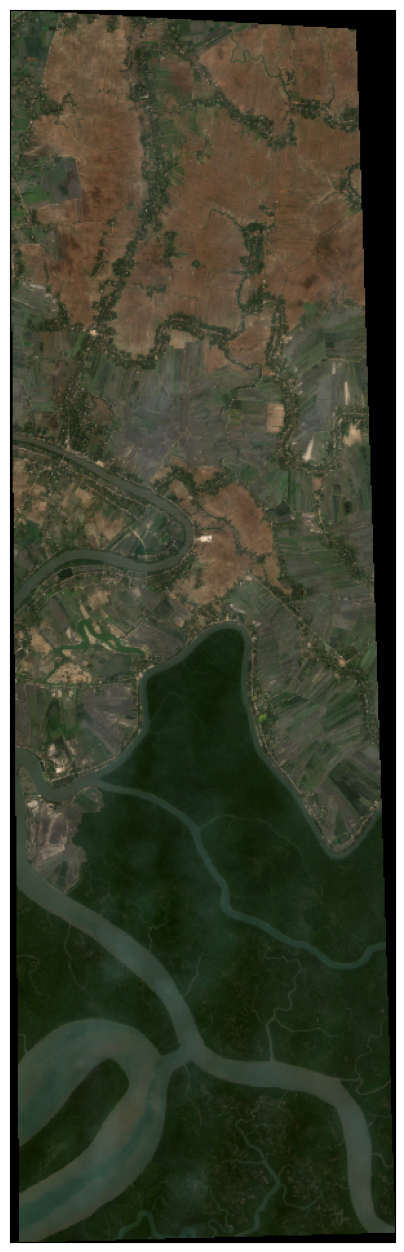

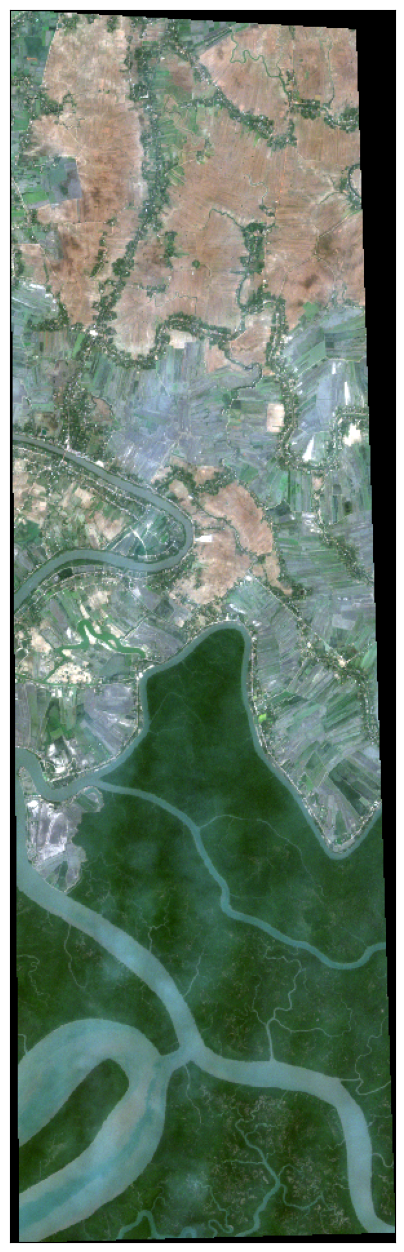

In [ ]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16))
plt.show()

# RGB Composite Image with Strech

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1),
            stretch=True,
            str_clip=0.2,
            figsize=(10, 16))
"""arr_st: This is the NumPy array that you want to use as the source of the RGB image.
rgb: This parameter specifies which bands of the array should be used as the red, green, and blue channels of the image. In this case, band 3 is used for the red channel, band 2 is used for the green channel, and band 1 is used for the blue channel. The order of the bands may be different depending on the specific data being used.
stretch: This parameter controls whether or not the color values should be stretched to improve the contrast of the image. When set to True, the color values are stretched using a linear contrast stretch.
str_clip: This parameter controls the amount of stretching applied to the color values. It is a float value between 0 and 1, where 0 means no stretching and 1 means maximum stretching.
figsize: This parameter sets the size of the figure in inches. In this case, the figure is 10 inches wide by 16 inches tall.
The ep.plot_rgb() function is useful for visualizing RGB images created from raster data, such as satellite imagery or aerial photography.
plt.show()//"""

# Visualizing the bands of the hyperspectral image dataset helps us to understand the distribution of pixels/values of the bands. 

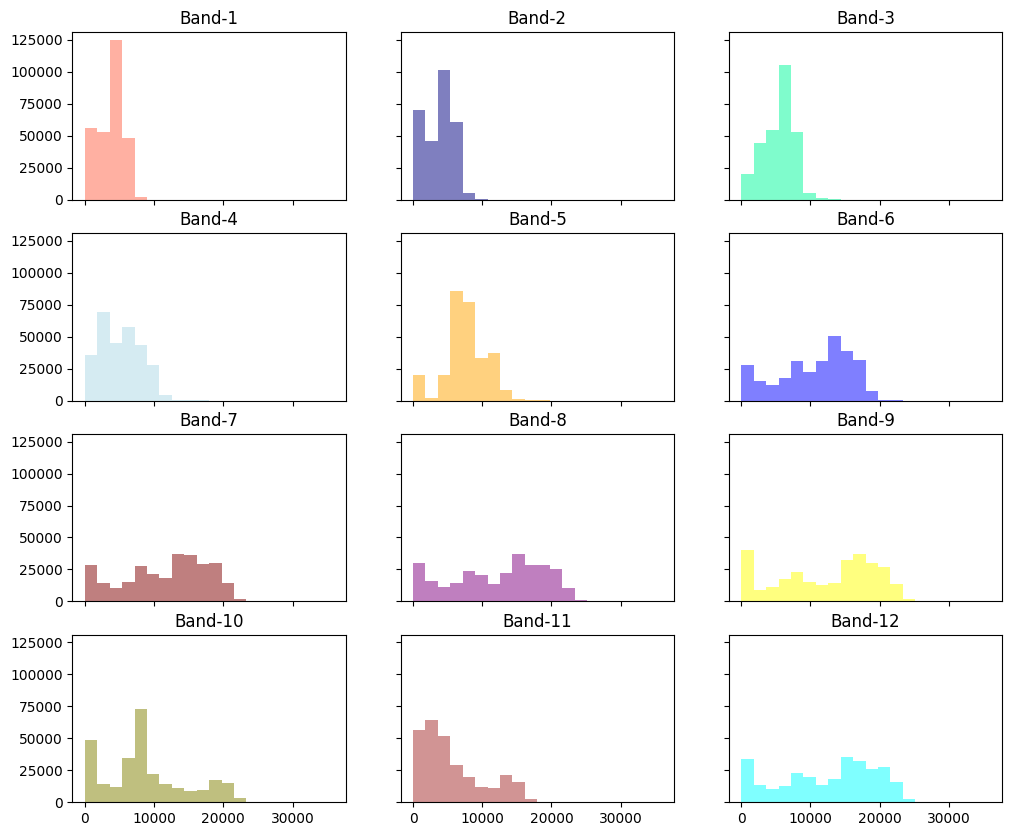

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()
"""The code  provided uses the ep.hist() function from the earthpy.plot module to create a histogram for each band of a 3D NumPy array. Here's what each parameter does:
arr_st: This is the NumPy array that you want to create histograms for. It is a 3D array with 12 bands.
colors: This parameter specifies the color of each histogram. In this case, a list of 12 color names is provided to color each histogram differently.
title: This parameter specifies the title for each histogram. In this case, a list of 12 titles is provided, one for each band of the array.
cols: This parameter sets the number of columns in the plot grid. In this case, the histograms are arranged in 3 columns, which means that there will be 4 histograms per row.
alpha: This parameter controls the transparency of each histogram. A value of 1.0 means that the histogram is fully opaque, while a value of 0.0 means that the histogram is fully transparent.
figsize: This parameter sets the size of the figure in inches. In this case, the figure is 12 inches wide by 10 inches tall.
The ep.hist() function is useful for visualizing the distribution of pixel values in each band of a raster dataset."""

Vegetation and soil indices are mathematical combinations of the reflectance values in different spectral bands of remotely sensed images, designed to highlight specific features and characteristics of vegetation and soils. These indices are widely used in various fields such as agriculture, ecology, land use and land cover mapping, and environmental monitoring.

# **Normalized Difference Vegetation Index (NDVI)**

# Normalized Difference Vegetation Index (NDVI) is a commonly used vegetation index that provides a measure of the density and health of vegetation cover in an area. It is calculated as the difference between the reflectance values in the near-infrared (NIR) and red bands of a remotely sensed image, divided by their sum. The formula for NDVI is:

**# NDVI = (NIR - Red) / (NIR + Red)**

# NDVI values range from -1 to 1, with values close to -1 indicating no vegetation cover, values close to 0 indicating sparse or stressed vegetation, and values close to 1 indicating dense and healthy vegetation. NDVI is useful for a wide range of applications, including crop monitoring, land use and land cover mapping, and environmental monitoring.

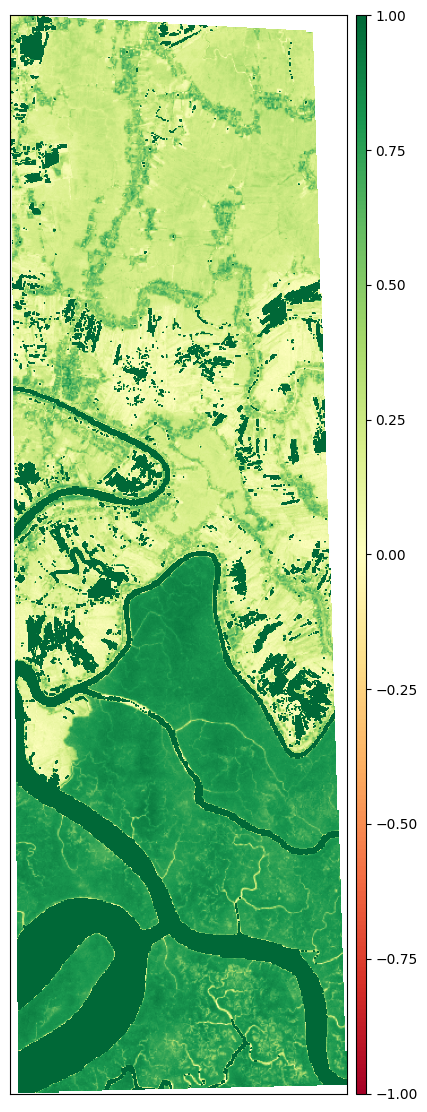

In [ ]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()
"""The code provided calculates the Normalized Difference Vegetation Index (NDVI) from two bands of a 3D NumPy array and visualizes it using the ep.plot_bands() function from the earthpy.plot module. Here's what each parameter does:
arr_st[7]: This selects the 8th band of the 3D NumPy array (remember that Python indexing starts at 0). In this case, band 8 is assumed to be the Near Infrared (NIR) band.
arr_st[3]: This selects the 4th band of the 3D NumPy array. In this case, band 4 is assumed to be the Red band.
es.normalized_diff(): This is a function from the earthpy.spatial module that calculates the NDVI from two input arrays. 
The formula for NDVI is (NIR - Red) / (NIR + Red). The normalized_diff() function takes care of the calculation and returns a new array with the same shape as the input arrays.
ep.plot_bands(): This function is used to create a multi-band plot from a NumPy array. In this case, the NDVI array is used as the input, and the colormap is set to "RdYlGn" to highlight areas of high and low vegetation. 
The cols parameter is set to 1, which means that the plot will have one column and stretch to fit the width of the figure. 
The vmin and vmax parameters are set to -1 and 1, respectively, to ensure that the colorbar spans the full range of possible NDVI values. Finally, the figsize parameter is set to (10, 14) to make the plot tall and narrow.
The NDVI is a commonly used index for measuring vegetation health and density. 
It ranges from -1 to 1, where values closer to 1 indicate high vegetation density, while values closer to -1 indicate low vegetation density or bare ground. 
By visualizing the NDVI using a color map, you can easily identify areas with high and low vegetation density in the image."""

# **Soil Adjusted Vegetation Index (SAVI)**

# Soil Adjusted Vegetation Index (SAVI) is a vegetation index that is similar to NDVI but is designed to correct for the influence of soil brightness on the index value. SAVI is particularly useful in areas where there is a lot of bare soil or where the soil brightness is high, as it can provide a more accurate measure of vegetation cover.

# The formula for SAVI is:

# SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)

# where L is the soil adjustment factor, which is used to adjust for variations in soil brightness. L can range from 0 to 1, with higher values indicating brighter soil. A commonly used value for L is 0.5.

# SAVI values range from -1 to 1, with values close to -1 indicating little or no vegetation cover, values close to 0 indicating sparse or stressed vegetation, and values close to 1 indicating dense and healthy vegetation.

# SAVI is useful in a range of applications, including agricultural monitoring, forestry, and land use and land cover mappin

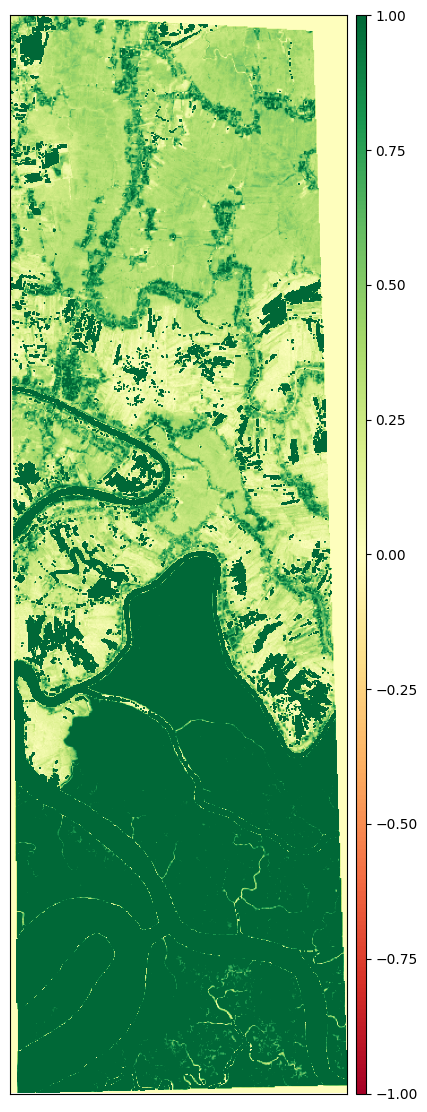

In [ ]:
L = 0.5

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

# **Visible Atmospherically Resistant Index (VARI)**

Visible Atmospherically Resistant Index (VARI) is a vegetation index that is similar to NDVI and SAVI but is designed to be less sensitive to atmospheric conditions. VARI uses the green band instead of the red band to calculate the index, which reduces the influence of atmospheric scattering and absorption.

The formula for VARI is:

VARI = (Green - Red) / (Green + Red - Blue)

where Green, Red, and Blue are the reflectance values in the respective spectral bands.

VARI values range from -1 to 1, with values close to -1 indicating little or no vegetation cover, values close to 0 indicating sparse or stressed vegetation, and values close to 1 indicating dense and healthy vegetation.

VARI can be useful in a range of applications, including crop monitoring, vegetation mapping, and environmental monitoring. However, it should be noted that VARI is less widely used than NDVI and SAVI, and its performance can vary depending on the specific conditions and vegetation types being studied.

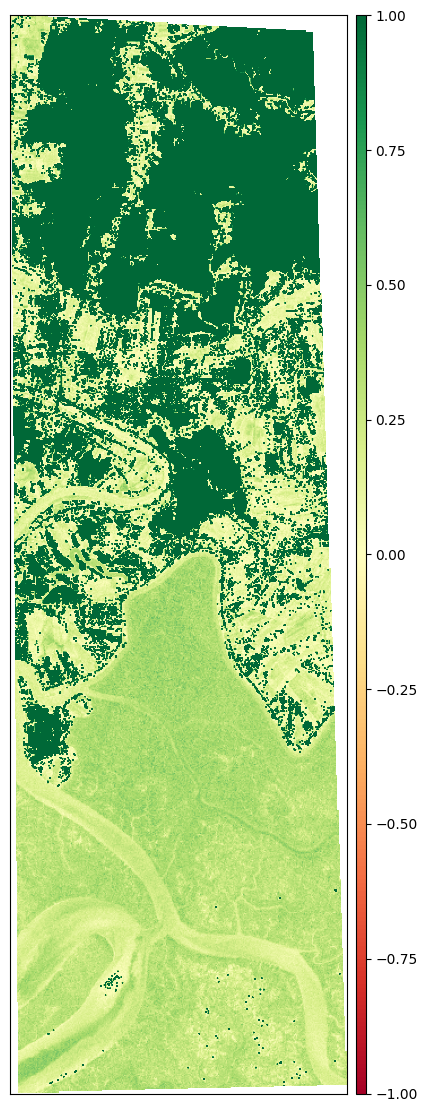

In [ ]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

**Surface water change is a very important indicator of environmental, climatic, and anthropogenic activities. Remote sensors, such as sentinel-2, Landsat, have been providing data for the last four decades, which are useful for extracting land cover types such as forest and water. Researchers have proposed many surface water extraction techniques, among which index-based methods are popular owing to their simplicity and cost-effectiveness.**

# Modified Normalized Difference Water Index (MNDWI)

The Modified Normalized Difference Water Index (MNDWI) is a remote sensing index used to identify water bodies in satellite imagery. It is similar to the Normalized Difference Water Index (NDWI) but uses different spectral bands to differentiate water bodies from other features.

The formula for calculating MNDWI is:

MNDWI = (Green - Mid Infrared) / (Green + Mid Infrared)

Where Green and Mid Infrared are the reflectance values in their respective spectral bands. The output values of MNDWI range from -1 to 1, with negative values indicating water and positive values indicating non-water features.

MNDWI is particularly useful in areas with low or no vegetation, such as deserts or urban areas, as it can help to distinguish water bodies from other features like bare soil or impervious surfaces. MNDWI can also be used to monitor changes in water bodies over time, such as the expansion or contraction of lakes or rivers.

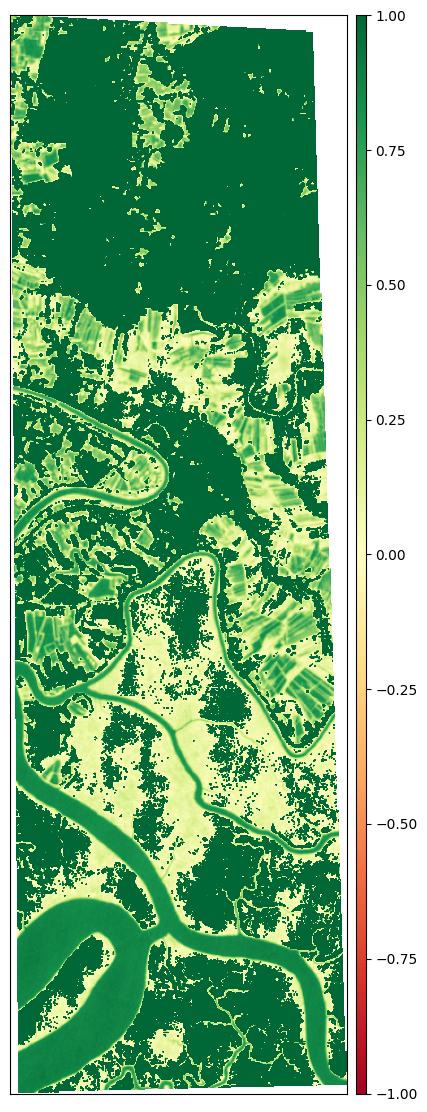

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

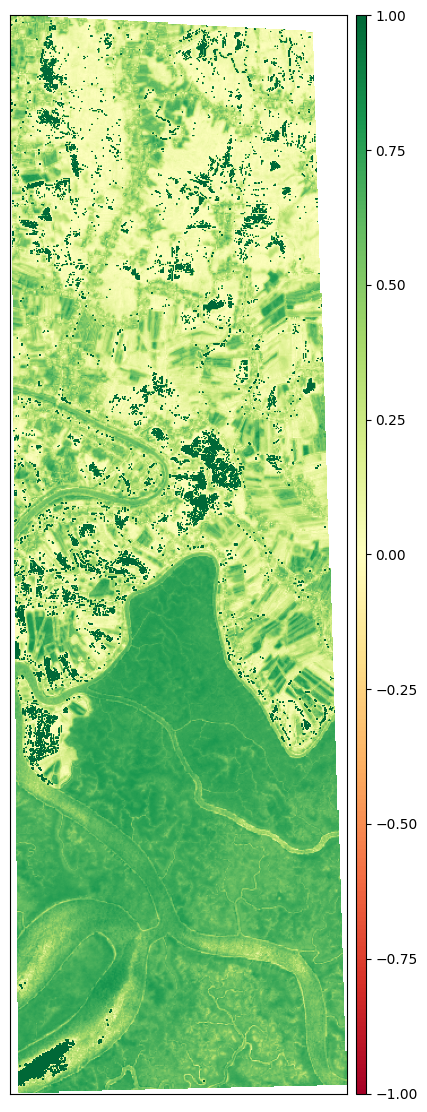

In [ ]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

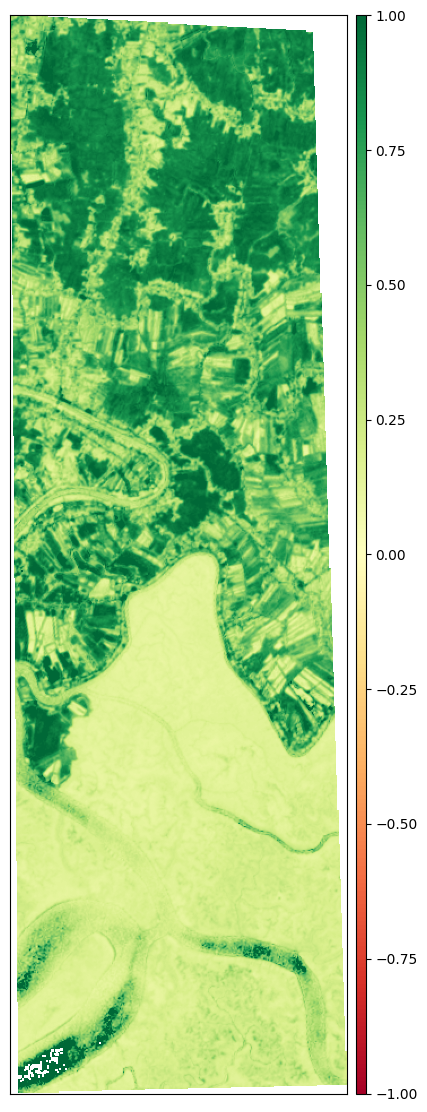

In [ ]:
cmr = np.divide(arr_st[10], arr_st[11])

ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

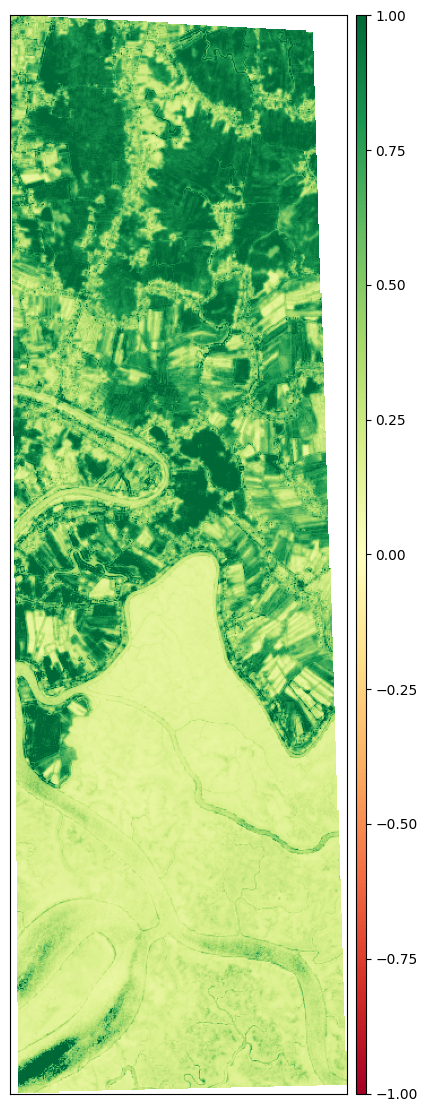

In [ ]:
fmr = np.divide(arr_st[10], arr_st[7])

ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()